In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 



# Imported Libraries

import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import collections

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import itertools

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV



df = pd.read_csv('creditcardcomplete.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# pip install xgboost


In [4]:

# pip install tensorflow

In [5]:

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [6]:

from sklearn.preprocessing import StandardScaler, RobustScaler



std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [7]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]



original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [     0      1      2 ... 284804 284805 284806] Test: [    12     14     22 ... 284791 284792 284800]
Train: [     0      1      2 ... 284803 284804 284806] Test: [     8      9     11 ... 284793 284797 284805]
Train: [     1      3      4 ... 284804 284805 284806] Test: [     0      2      5 ... 284796 284799 284802]
Train: [     0      2      3 ... 284802 284805 284806] Test: [     1      4      6 ... 284801 284803 284804]
Train: [     0      1      2 ... 284803 284804 284805] Test: [     3     10     24 ... 284787 284798 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
def plot_confusion_matrx(original_ytest,fraud_predictions, name = " "):
    oversample_smote = confusion_matrix(original_ytest, fraud_predictions)
    actual_cm = confusion_matrix(original_ytest, original_ytest)
    labels = ['No Fraud', 'Fraud']

    fig = plt.figure(figsize=(16,8))

    fig.add_subplot(221)
    plot_confusion_matrix(oversample_smote, labels, title="SMOTE "+name+"\n Confusion Matrix", cmap=plt.cm.Oranges)

    fig.add_subplot(222)
    plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (Ideal Case)", cmap=plt.cm.Greens)

In [12]:
def tune_the_estimator(estimator, params,Xsm_train,ysm_train, X_test, y_test):

    grid_search = GridSearchCV(estimator = estimator, param_grid = params, 
                              cv = 2, n_jobs = -1, verbose = 2)

    grid_search.fit(Xsm_train,ysm_train)
    bestXgbClassifier = grid_search.best_estimator_
    print(bestXgbClassifier)
    fraud_predictions = bestXgbClassifier.predict(X_test)
    print(classification_report(y_test, fraud_predictions))
    print(bestXgbClassifier)
    print('-' * 45 + "Test Performance"+"-"*45)
    print('Recall Score: {:.2f} '    .format(recall_score   (y_test, fraud_predictions)))
    print('Precision Score: {:.2f}'  .format(precision_score(y_test, fraud_predictions)))
    print('F1 Score: {:.2f}'         .format(f1_score       (y_test, fraud_predictions)))
    print('Accuracy Score: {:.2f} \n'.format(accuracy_score (y_test, fraud_predictions)))
#     print('---' * 45)
    return fraud_predictions

In [15]:
xgb_params = {
        'n_estimators' : [200, 400, 600, 800],
        'learning_rate' : [0.001, 0.005, 0.01,0.05],
        'min_child_weight': [2, 4, 6, 8],
        'gamma': [0.1],
        'subsample': [0.5],
        'colsample_bytree': [0.4],
        'max_depth': [4]
        }
knears_params = {"n_neighbors": list(range(2,10,2)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}




log_reg_params = {"penalty": ['l2'], 'C': [ 0.01, 0.1, 1, 10]}


random_forest_parameters = {
    'criterion'         : [ 'gini','entrophy'],     
    'n_estimators'      : [100, 200, 400, 600, 800, 1000],
    'max_depth'         : [15],
    
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' :  [2, 5, 10] 
   
}

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

svc_params = {'C': [0.5, 0.7, 0.9, 1]}

classifiers_for_tune = {
    "LogisiticRegression": LogisticRegression(solver = "lbfgs"),
    "KNearest": KNeighborsClassifier(),
    "SVC": LinearSVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "xGBClassifier":XGBClassifier()
}

## SMOTE

In [16]:

sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)



Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

## ADASYN

In [ ]:

# sm = ADASYN(ratio='minority', random_state=42)

# Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

# Logistic Regressor

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:   14.6s remaining:   24.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   15.5s finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.11      0.87      0.20        98

   micro avg       0.99      0.99      0.99     56961
   macro avg       0.56      0.93      0.60     56961
weighted avg       1.00      0.99      0.99     56961

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
---------------------------------------------Test Performance---------------------------------------------
Recall Score: 0.87 
Precision Scor

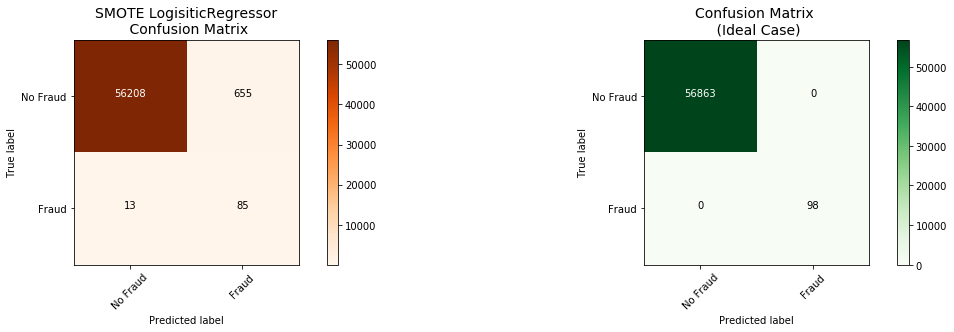

In [16]:
fraud_predictions = tune_the_estimator(estimator=classifiers_for_tune["LogisiticRegression"], params=log_reg_params,Xsm_train = Xsm_train,ysm_train = ysm_train, 
                      X_test = original_Xtest, y_test = original_ytest)

plot_confusion_matrx(original_ytest,fraud_predictions, name="LogisiticRegressor")

## Neural Network

In [17]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [18]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363923 samples, validate on 90981 samples
Epoch 1/20
 - 2s - loss: 0.0699 - accuracy: 0.9733 - val_loss: 0.0247 - val_accuracy: 0.9948
Epoch 2/20
 - 2s - loss: 0.0132 - accuracy: 0.9970 - val_loss: 0.0147 - val_accuracy: 0.9989
Epoch 3/20
 - 2s - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0056 - val_accuracy: 0.9999
Epoch 4/20
 - 2s - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0027 - val_accuracy: 0.9999
Epoch 5/20
 - 2s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0016 - val_accuracy: 0.9999
Epoch 6/20
 - 2s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9997
Epoch 7/20
 - 2s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 6.7709e-04 - val_accuracy: 1.0000
Epoch 8/20
 - 2s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 7.6065e-04 - val_accuracy: 1.0000
Epoch 9/20
 - 2s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 8.0674e-04 - val_accuracy: 1.0000
Epoch 10/20
 - 2s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 7.7429e-04 - val_accuracy: 1.0000
Ep

In [20]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [21]:
oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
Confusion matrix, without normalization


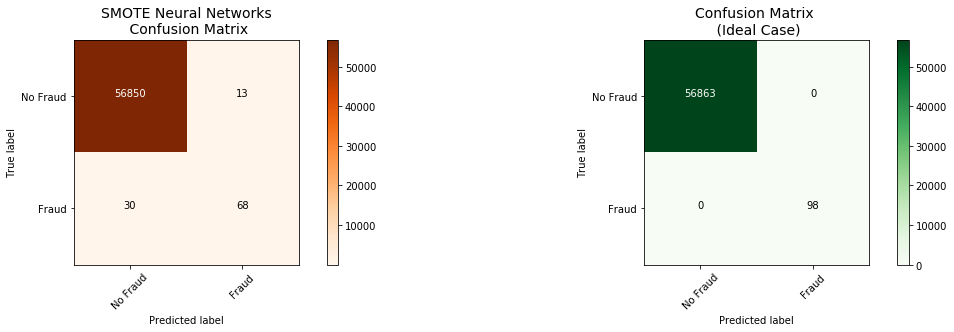

In [22]:
plot_confusion_matrx(original_ytest,oversample_fraud_predictions, name = "Neural Networks")

In [23]:
print(original_Xtest.shape)
# type(Xsm_train)
print(Xsm_train.shape)
print(pd.DataFrame(ysm_train)[0].value_counts())

print(pd.DataFrame(original_ytest)[0].value_counts())

(56961, 30)
(454904, 30)
1    227452
0    227452
Name: 0, dtype: int64
0    56863
1       98
Name: 0, dtype: int64


## Random Forest

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

   micro avg       1.00      1.00      1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_sample

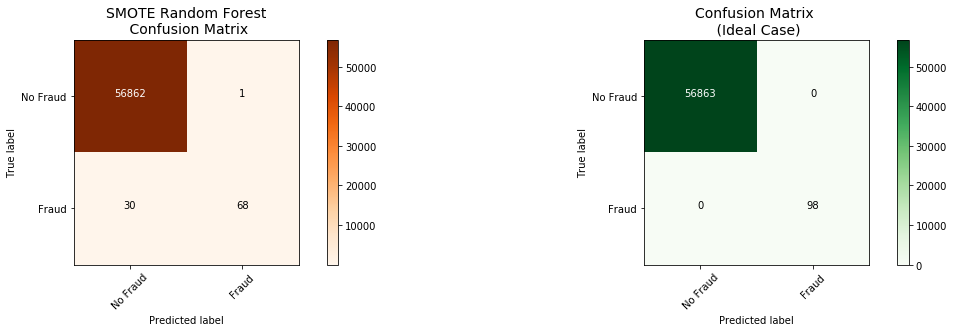

In [24]:
fraud_predictions = tune_the_estimator(estimator=classifiers_for_tune["Random Forest"], params=random_forest_parameters,Xsm_train = Xsm_train,ysm_train = ysm_train, 
                      X_test = original_Xtest, y_test = original_ytest)

plot_confusion_matrx(original_ytest,fraud_predictions, name = "Random Forest")

## XGBoost Classifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.6min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
       learning_rate=0.001, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5, verbosity=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.42      0.83      0.55        98

   micro avg       1.00      1.00      1.00     56961
   macro avg       0.71      0.91      0.78     56961
weighted avg       1.00      1.00      1.00     56961

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
       learning_rate=0.001, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estima

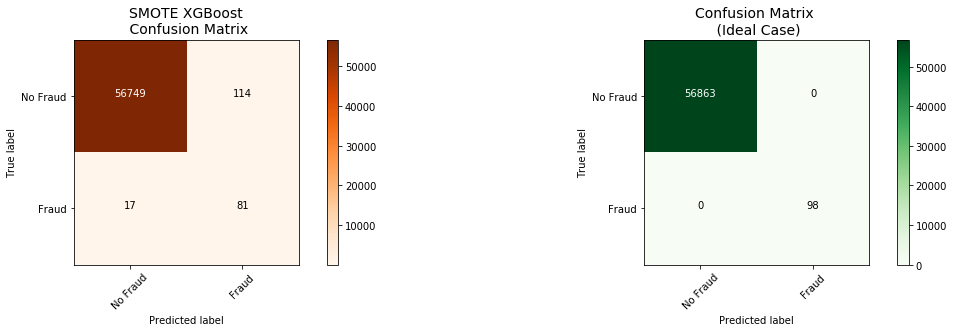

In [25]:
fraud_predictions = tune_the_estimator(estimator=classifiers_for_tune["xGBClassifier"], params=xgb_params,Xsm_train = Xsm_train,ysm_train = ysm_train, 
                      X_test = original_Xtest, y_test = original_ytest)


plot_confusion_matrx(original_ytest,fraud_predictions, name = "XGBoost")

## SVC

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:  1.3min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.4min finished


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.93      0.12        98

   micro avg       0.98      0.98      0.98     56961
   macro avg       0.53      0.95      0.55     56961
weighted avg       1.00      0.98      0.99     56961

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
---------------------------------------------Test Performance---------------------------------------------
Recall Score: 0.93 
Precision Score: 0.06
F1 Score: 0.12
Accuracy Score: 0.98 

Confusion matrix, without normalization
Confusion matrix, wi

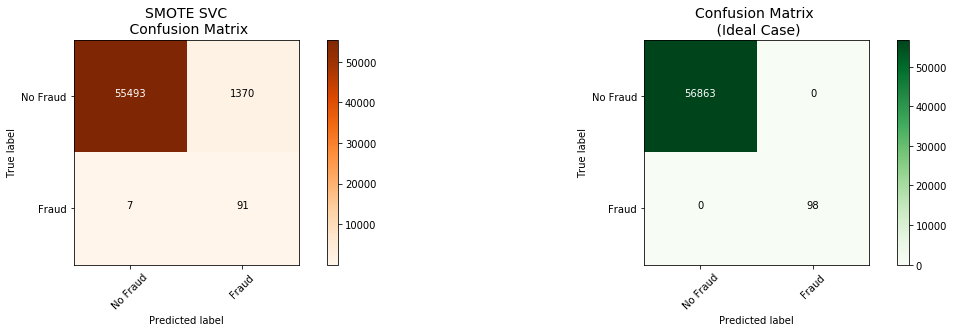

In [17]:
fraud_predictions = tune_the_estimator(estimator=classifiers_for_tune["SVC"], params=svc_params,Xsm_train = Xsm_train,ysm_train = ysm_train, 
                      X_test = original_Xtest, y_test = original_ytest)


plot_confusion_matrx(original_ytest,fraud_predictions, name = "SVC")

## Decsion tree

In [ ]:
fraud_predictions = tune_the_estimator(estimator=classifiers_for_tune["DecisionTreeClassifier"], params=tree_params,Xsm_train = Xsm_train,ysm_train = ysm_train, 
                      X_test = original_Xtest, y_test = original_ytest)


plot_confusion_matrx(original_ytest,fraud_predictions, name = "DecisionTreeClassifier")




## KNN

In [ ]:
fraud_predictions = tune_the_estimator(estimator=classifiers_for_tune["KNearest"], params=knears_params,Xsm_train = Xsm_train,ysm_train = ysm_train, 
                      X_test = original_Xtest, y_test = original_ytest)

plot_confusion_matrx(original_ytest,fraud_predictions,name="KNN")